🌞 Good Morning, Everyone!
Welcome to today's session — I hope you're all doing great! 😊

📊 Today, we’ll explore Linear Regression using a real-world Insurance Dataset — it’s going to be exciting and full of practical insights!

🧠 Make sure your theory is revised and tools are ready — we’ll connect the dots between concepts and coding.

🚀 We’ll be starting in the next few minutes as others join in — get ready for a great learning experience!

In [ ]:
# Machine learning

# supervised ----where we have labeled data--target col
# unsupervised----un labeled data
# reinforcement---learns from the mistakes and upgrade itself

In [ ]:
# supervised --- regression and classfication
# regression --  when the target is having continous numeric data---regression
# classfication--- when the data is binary in target column

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/new_insurance_data (1).csv")

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


age	Age of the individual (in years).

sex	Gender of the individual – typically "male" or "female".

bmi	Body Mass Index: a health metric calculated from height and weight.

children	Number of children/dependents covered by health insurance.

smoker	Indicates whether the individual is a smoker (yes/no).

Smoking increases health risks and insurance costs.

Claim_Amount	The amount the person has claimed in health insurance.

past_consultations	Number of times the person visited doctors or consulted health professionals in the past.

num_of_steps	Possibly a yearly/monthly/daily average number of steps walked (could be from a fitness tracker).

Hospital_expenditure	Total money spent in hospitals (likely medical expenses before or during insurance).

NUmber_of_past_hospitalizations	Number of times the person was hospitalized in the past.

Anual_Salary	Annual salary/income of the individual.

region	Geographic region – southeast, northwest, northeast, etc., representing where the person lives.

charges	Target variable – Final insurance charge billed to the person. This is the amount you may want to predict using a machine learning model.

#it is a regression pblm becoz the target col has continous numeric values

In [ ]:
#null values
#duplicate values
#outliers

In [ ]:
#null values

df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()

np.int64(52)

In [ ]:
# df["Claim_Amount"].fillna( 0 , inplace=True )
# df["age"].fillna( 0 , inplace=True )
# df["bmi"].fillna( 0 , inplace=True )
# df["children"].fillna( 0 , inplace=True )
# df["past_consultations"].fillna( 0 , inplace=True )
# df["num_of_steps"].fillna(0,inplace = True)
# df["NUmber_of_past_hospitalizations"].fillna(0,inplace = True)
# df["Anual_Salary"].fillna(0,inplace = True)
# df["Hospital_expenditure "].fillna(0,inplace = True)

In [ ]:
(52/1338) *100

3.8863976083707024

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
#imputation

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = df[i].fillna(df[i].mode()[0])
  else:
    df[i] = df[i].fillna(df[i].mean())


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
#duplicate
df.duplicated().sum()

np.int64(0)

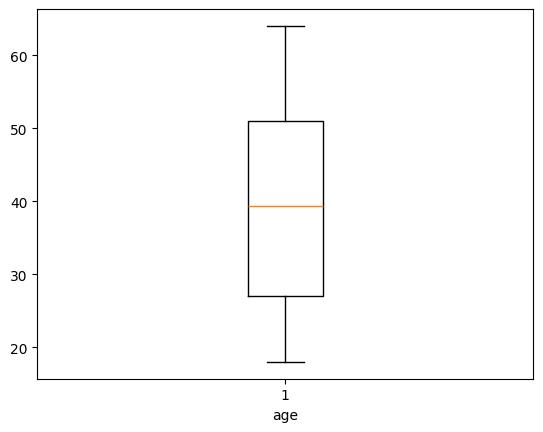

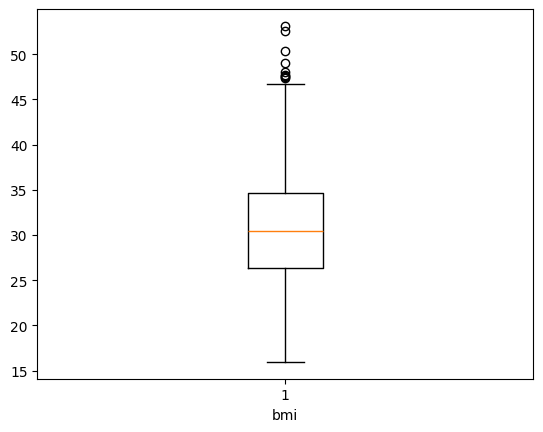

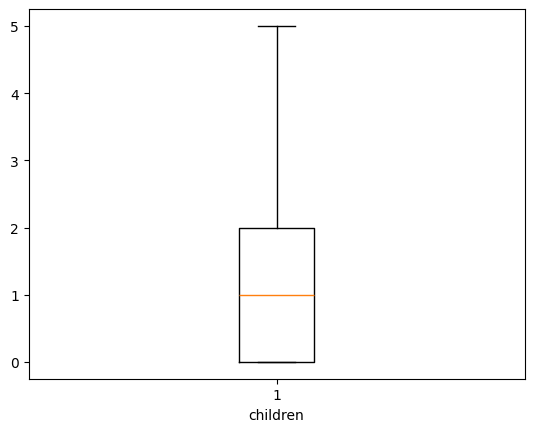

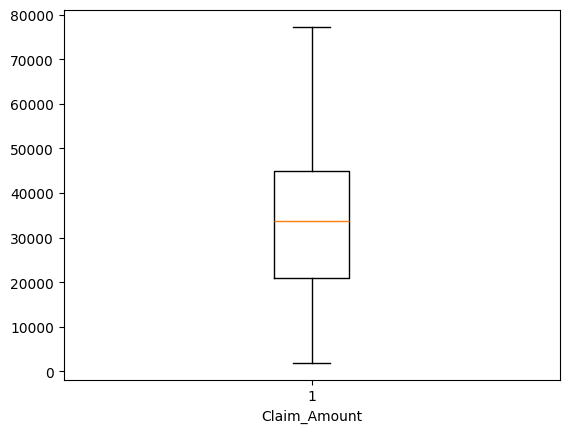

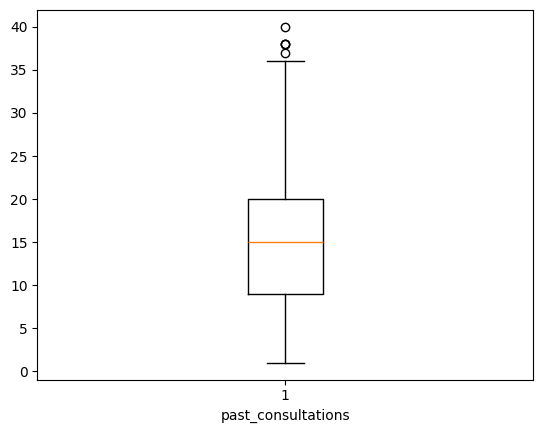

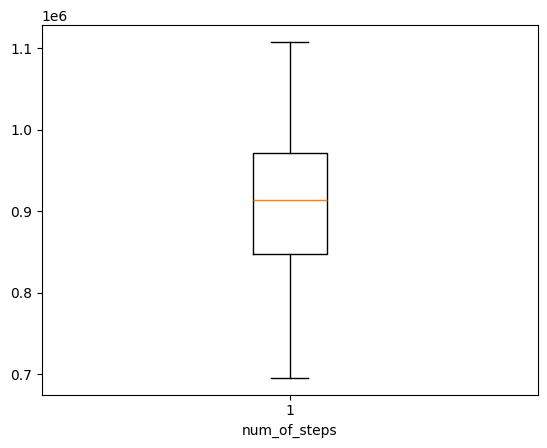

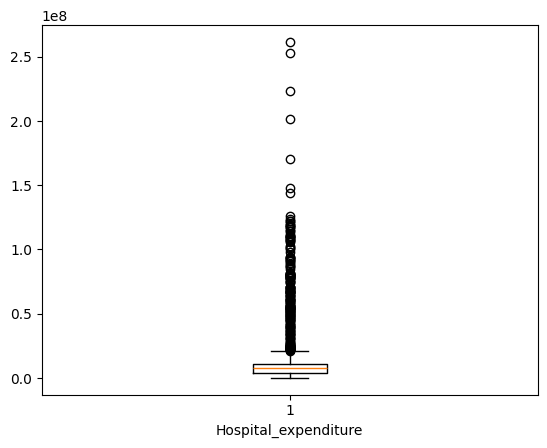

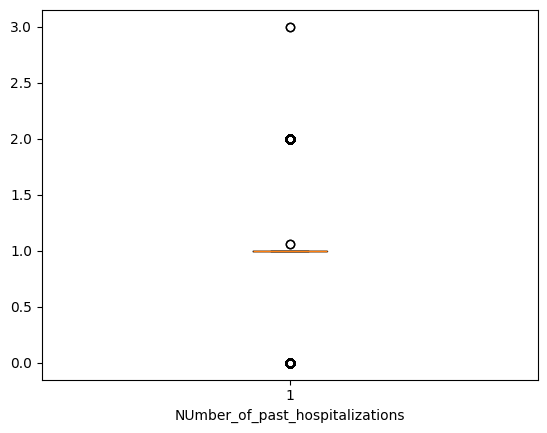

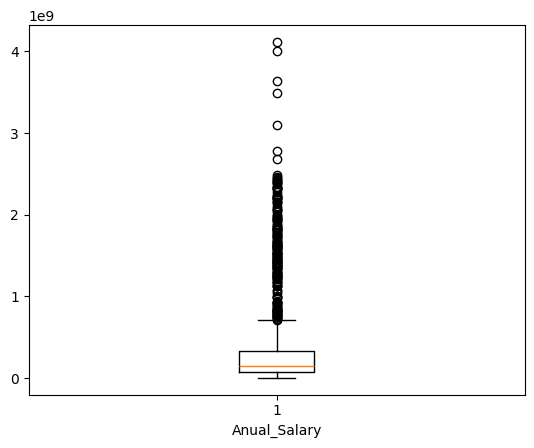

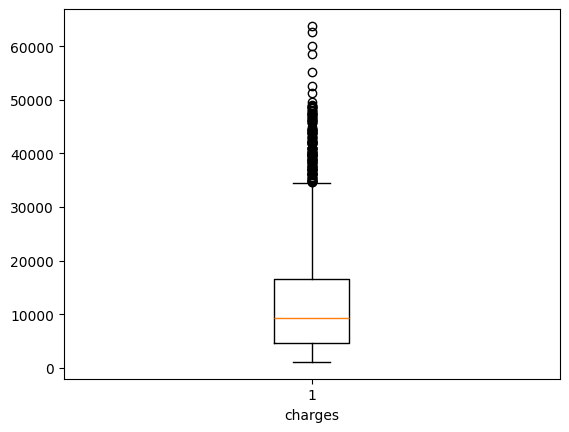

In [ ]:
#outliers

for i in df.columns:
  if(df[i].dtypes != 'object'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
out_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary','NUmber_of_past_hospitalizations']

In [ ]:
for i in out_list:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  lb = Q1-1.5*IQR
  ub = Q3+1.5*IQR
  df =df[ (df[i] >= lb) & (df[i]) <= ub]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#cat --- numerical --- label encoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1,55135.40209
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0,58571.07448
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1,60021.39897
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2,62592.87309


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   int64  
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   int64  
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   int64  
 12  charges             

In [ ]:
#MODEL BUILDING

# IMPORT LIB
# SPLIT THE DATA
# TRAINTEST SPLIT
# TRAINING
# testing
# EVALUATION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# SPLIT THE DATA

x = df.drop(columns = ['charges'])  #independent
y = df['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2


In [ ]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


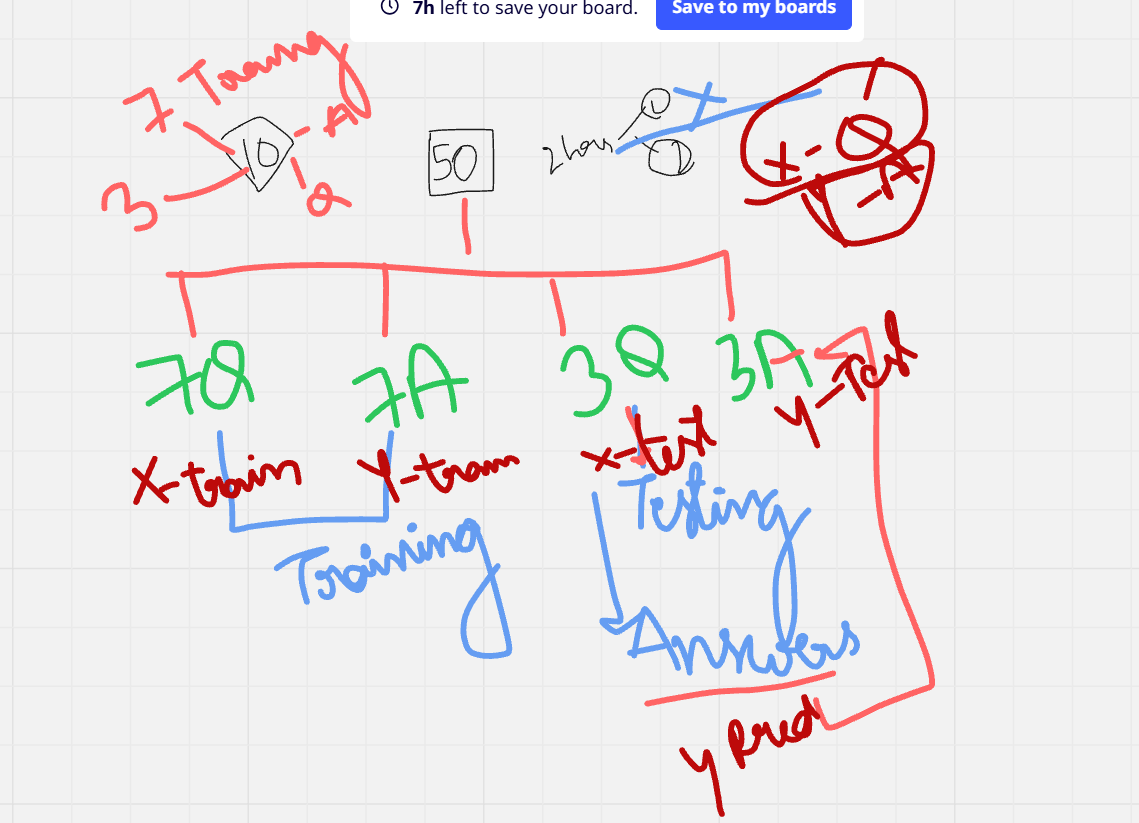

training---x-train,y-train

testing---xtest

evaluation--ypred to ytest


In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size= 0.7,random_state = 42)

In [ ]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
332,30.0,0,22.895,1.0,0,32439.93985,11.0,840452.0,3.852491e+06,1.0,9.007806e+07,0
355,31.0,0,23.600,2.0,0,19683.13183,19.0,849891.0,5.257252e+06,1.0,1.103433e+08,3
138,21.0,0,35.720,0.0,0,29979.11978,21.0,783258.0,8.026176e+06,0.0,9.187363e+07,1
381,36.0,0,30.020,0.0,0,51629.60036,4.0,850657.0,3.703379e+06,1.0,5.006280e+07,1
292,28.0,0,26.510,2.0,0,15024.52722,3.0,838424.0,9.950954e+06,1.0,1.925496e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,59.0,1,37.400,0.0,0,47554.34106,19.0,1007896.0,1.132722e+07,1.0,5.662888e+08,3
1130,46.0,1,27.600,0.0,0,63672.07916,14.0,1000863.0,2.295519e+07,2.0,6.472972e+08,3
1294,54.0,1,34.210,2.0,1,42578.49702,24.0,1061168.0,9.188836e+07,2.0,2.038383e+09,2
860,58.0,0,36.480,0.0,0,27369.02461,22.0,943007.0,3.634140e+06,1.0,1.877743e+08,1


In [ ]:
my_model = LinearRegression()

In [ ]:
#training

my_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#testing
y_pred =my_model.predict(x_test)

In [ ]:
y_pred

array([ 1.06343155e+04,  1.13743645e+04,  1.21336944e+04,  4.31928332e+04,
        4.32927709e+03,  1.97363371e+04,  1.19526734e+04,  1.13311157e+04,
        4.25749865e+04,  1.00722775e+04,  1.04633549e+04,  8.89561170e+03,
        1.09109650e+02,  5.12565873e+03,  1.18456094e+04,  1.26936097e+04,
        9.07248179e+03,  9.34465618e+03,  8.40914956e+03,  1.25949139e+04,
        7.27644147e+03,  8.32147460e+03,  7.82684452e+03,  2.14438570e+03,
        2.32518963e+04,  8.87650635e+03,  1.21258260e+04,  6.92381321e+03,
        4.90841694e+03,  1.16627530e+04,  3.97011888e+04,  1.25107759e+04,
        1.07827145e+04,  2.46384073e+04,  2.07259974e+04,  9.85467910e+03,
        6.00239921e+03,  4.09725844e+04,  2.66240264e+04,  1.35723758e+03,
        7.95260342e+02,  7.47232182e+03,  1.35541337e+04,  1.79028894e+04,
        5.07975940e+03,  3.26022818e+03,  8.20018010e+02,  1.18778088e+04,
        5.30581454e+03,  4.23495962e+03,  8.85016493e+03,  3.65666148e+03,
        1.25537456e+04,  

In [ ]:
from sklearn.metrics import *

In [ ]:
result = r2_score(y_test,y_pred)

In [ ]:
result

0.97898148312665

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

966.6242451669647

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

3213469.5774475294

In [ ]:
rmse = np.sqrt(mse)
rmse

np.float64(1792.6152898621415)

In [ ]:
y_test

,charges
764,10928.84900
887,12648.70340
890,12797.20962
1293,44202.65360
259,3925.75820
...,...
701,9863.47180
672,9414.92000
1163,27941.28758
1103,22395.74424


<Axes: ylabel='charges'>

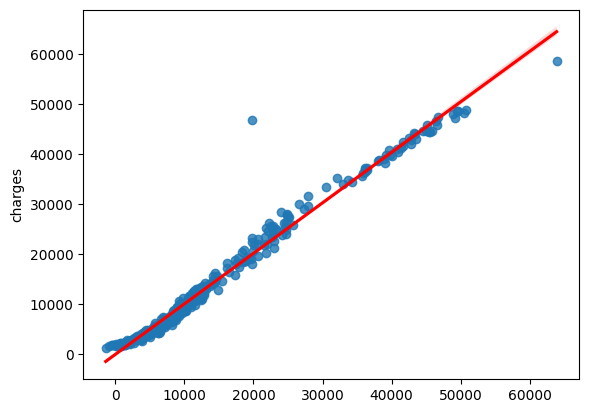

In [ ]:
sns.regplot(x = y_pred, y =y_test,line_kws={'color':'red'})